Solving exercises in ch7 Deep Learning with Pytorch book

The dataset is zipped, but we can use the cifar10 dataset available in public domain.

In [1]:
from torchvision import datasets

## Q1.  Use torchvision to implement random cropping of the data.

Lets try and implement random crop using transforms. Lets first see what transforms are available.

In [7]:
from torchvision import transforms

dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

lets initialize a normalize function with values given from the book itself.

In [41]:
normalize = transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))

you can compose a transformation pipeline using transforms.Compose.

In [42]:
train_transform = transforms.Compose(
                    [transforms.RandomCrop(32,32),
                     transforms.ToTensor(),
                     normalize]
)

lets download the data

In [43]:
data_path = './'

cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=train_transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=train_transform)

Files already downloaded and verified
Files already downloaded and verified


In [44]:
len(cifar10), len(cifar10_val)

(50000, 10000)

we have 50000 images for training and 10000 for validation

In [45]:
img, label = cifar10[30000]
# img, label

In [46]:
import matplotlib.pyplot as plt

In [47]:
def get_cropped_image(index, number):
    columns = number
    rows = 1
    fig = plt.figure(figsize=(32,32))
    for i in range(1, columns*rows +1):
        img, label = cifar10[index]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img.permute(1,2,0))
    plt.show() 

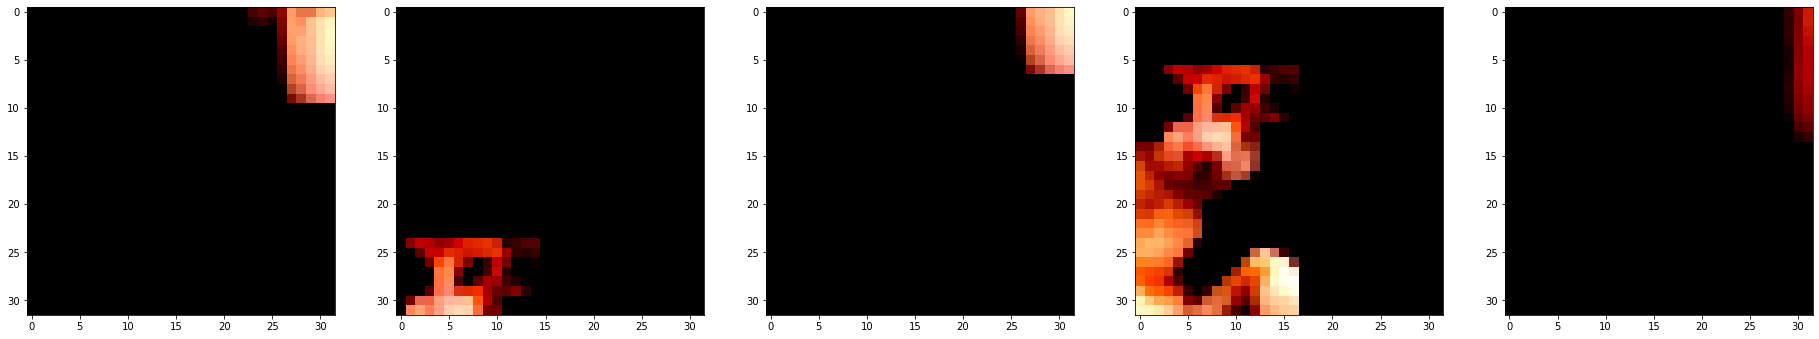

In [50]:
get_cropped_image(550, 5)

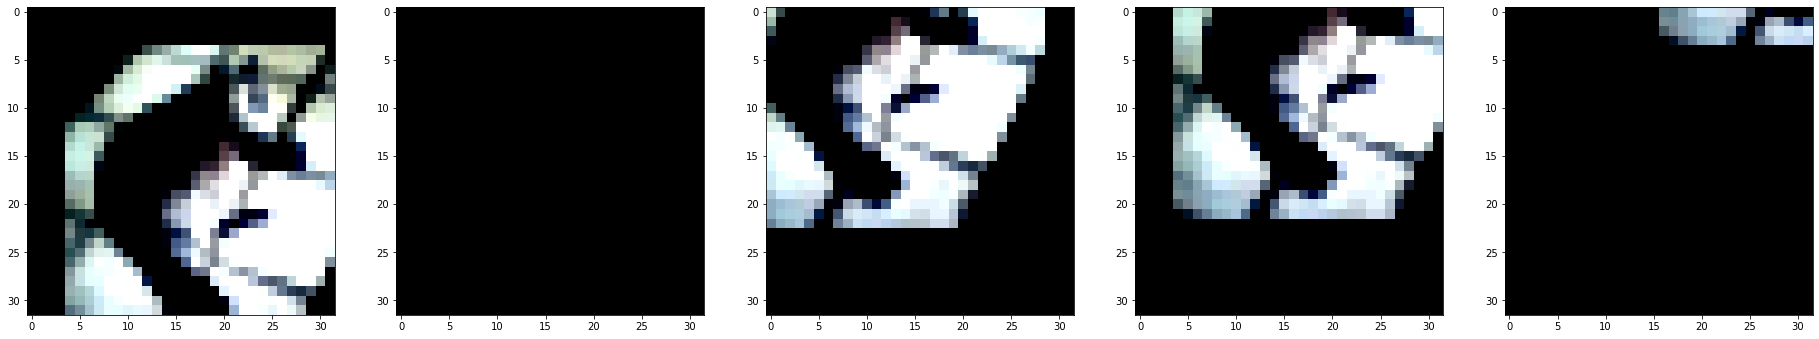

In [51]:
get_cropped_image(20345,5)

Random resized crop is definitly as random as it professes out to be. Is it possible to create a classfiier with this? lets find out. We will create a simple classfier that checks between a plane and a bird.

the classes in cifar10.

In [55]:
cifar10.classes, len(cifar10.classes)

(['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 10)

Lets create a simple model.

In [57]:
import torch.nn as nn
import torch.optim as optim

In [82]:
# model = nn.Sequential(
#         nn.Linear(3072, 1024),
#         nn.Tanh(),
#         nn.Linear(1024, 512),
#         nn.Tanh(),
#         nn.Linear(512, 128),
#         nn.Tanh(),
#         nn.Linear(128, 10),
#         nn.LogSoftmax(dim=1)
# )

#simpler
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 10),
    nn.LogSoftmax(dim=1)
)

defining hyperparameters

In [83]:
loss_fn = nn.NLLLoss()
n_epochs = 30
learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(),
                      lr = learning_rate)

In [84]:
import torch

training

In [85]:
for epoch in range(n_epochs):
    for img, label in cifar10:
        print("Current label: ", label, end="\r")
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: ", epoch, "Loss: ", float(loss))

Epoch:  0 Loss:  1.493204116821289 8 8 0
Epoch:  1 Loss:  0.121975064277648935 8 8 46 8 9 7 2 3 0 9 2 4 3 8
Epoch:  2 Loss:  2.45775318145751956 9 0 1 86 43 9 8 7 5 1 1
Epoch:  3 Loss:  0.1783255785703659 4 8 88 2


KeyboardInterrupt: 

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in cifar10_val:
        outputs = model(img.view(-1).unsqueeze(0))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted==labels).sum())

print("Accuracy: ", correct/total)

We can also could have used data loaders for creating batches for iterating over in every epoch.

# Q2. Switch Loss function

We will use MSELoss for testing

In [86]:
loss_fn = nn.MSELoss()
n_epochs = 1
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

we will create a data loader this time.

In [95]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=10,shuffle=True )

In [100]:
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels.type(torch.FloatTensor))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: ", epoch, " loss: ", float(loss))

Epoch:  0  loss:  nan


Checking on validation set

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=10, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted==labels).sum())

print("Accuracy: ", correct/total)